Saved full land mask to 'global_land_mask_0.1deg_full.nc'
Saved land mask without poles to 'global_land_mask_0.1deg_no_poles.nc'


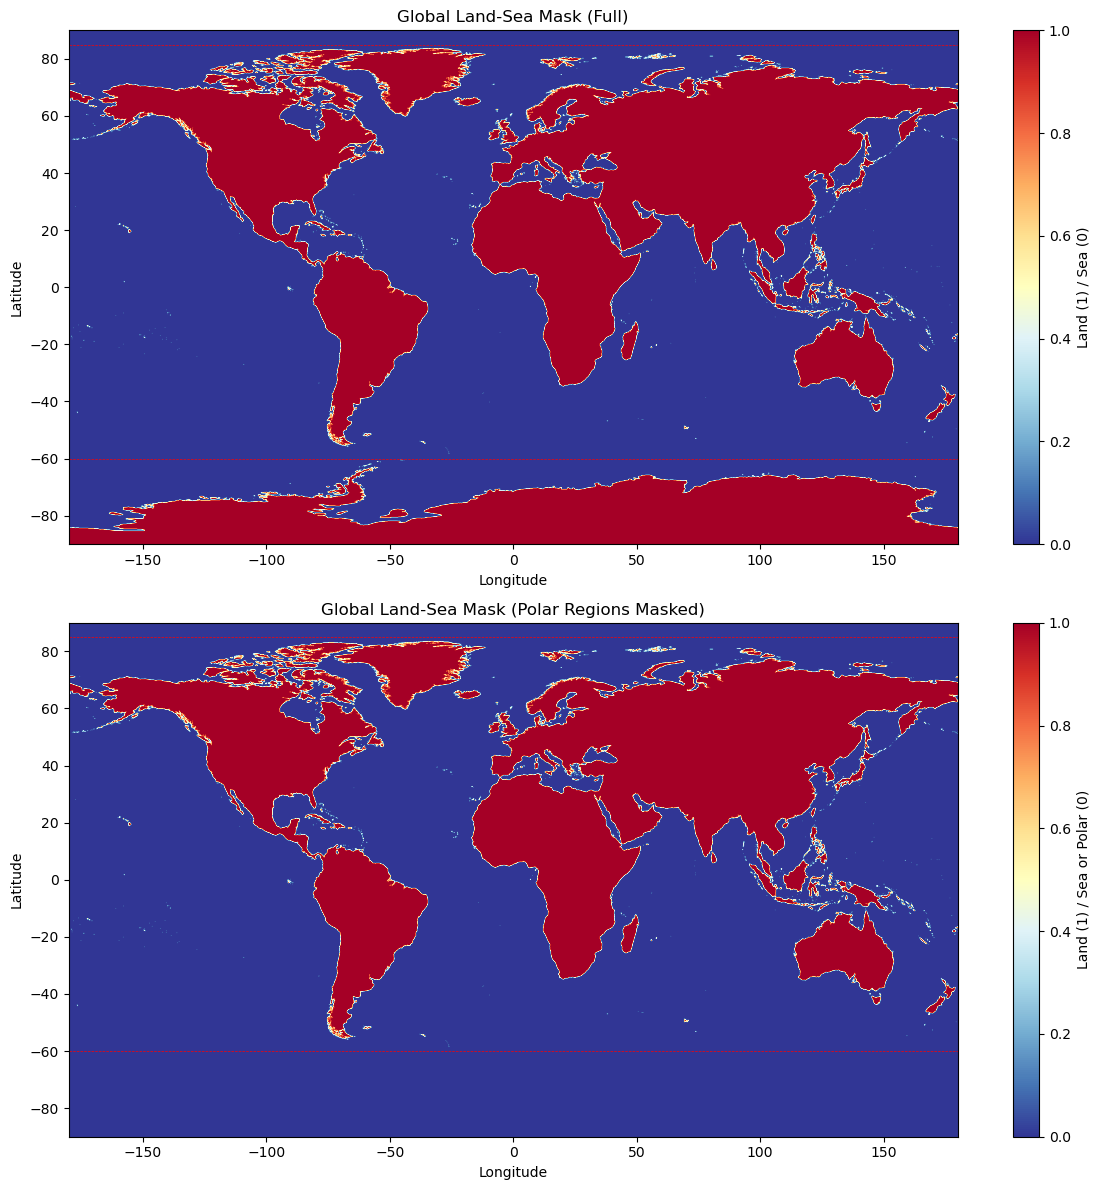


Loaded NetCDF file: global_land_mask_0.1deg_full.nc
<xarray.Dataset>
Dimensions:    (lat: 1801, lon: 3600)
Coordinates:
  * lat        (lat) float64 90.0 89.9 89.8 89.7 ... -89.7 -89.8 -89.9 -90.0
  * lon        (lon) float64 -180.0 -179.9 -179.8 -179.7 ... 179.7 179.8 179.9
Data variables:
    land_mask  (lat, lon) int8 ...

Loaded NetCDF file: global_land_mask_0.1deg_no_poles.nc
<xarray.Dataset>
Dimensions:             (lat: 1801, lon: 3600)
Coordinates:
  * lat                 (lat) float64 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * lon                 (lon) float64 -180.0 -179.9 -179.8 ... 179.7 179.8 179.9
Data variables:
    land_mask_no_poles  (lat, lon) int8 ...


In [10]:
import numpy as np
from global_land_mask import globe
import matplotlib.pyplot as plt
import xarray as xr

# Create a grid of lat/lon points
lat = np.arange(90, -90.1, -0.1)  # 90 to -90 inclusive, in descending order
lon = np.arange(-180, 180, 0.1)  # -180 to 179.9 (180 is equivalent to -180)

# Create meshgrid
lon_grid, lat_grid = np.meshgrid(lon, lat)

# Get land mask
land_mask = globe.is_land(lat_grid, lon_grid)

# Create polar circles mask
arctic_circle = 85
antarctic_circle = -60
polar_mask = (lat_grid <= arctic_circle) & (lat_grid >= antarctic_circle)

# Apply polar mask to land mask
land_mask_no_poles = land_mask * polar_mask

# Create xarray DataArrays
da_full = xr.DataArray(
    data=land_mask.astype(np.int8),
    dims=['lat', 'lon'],
    coords={'lat': lat, 'lon': lon},
    attrs={'long_name': 'Land-Sea Mask', 'units': '1 for land, 0 for sea'}
)

da_no_poles = xr.DataArray(
    data=land_mask_no_poles.astype(np.int8),
    dims=['lat', 'lon'],
    coords={'lat': lat, 'lon': lon},
    attrs={'long_name': 'Land-Sea Mask (Polar Regions Masked)', 'units': '1 for land, 0 for sea/polar'}
)

# Create xarray Datasets
ds_full = xr.Dataset({'land_mask': da_full})
ds_no_poles = xr.Dataset({'land_mask_no_poles': da_no_poles})

# Save as NetCDF
ds_full.to_netcdf('global_land_mask_0.1deg_full.nc')
ds_no_poles.to_netcdf('global_land_mask_0.1deg_no_poles.nc')
print("Saved full land mask to 'global_land_mask_0.1deg_full.nc'")
print("Saved land mask without poles to 'global_land_mask_0.1deg_no_poles.nc'")

# Visualize both masks
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

im1 = ax1.imshow(land_mask, extent=[-180, 180, -90, 90], cmap='RdYlBu_r', aspect='auto', origin='upper')
ax1.set_title('Global Land-Sea Mask (Full)')
plt.colorbar(im1, ax=ax1, label='Land (1) / Sea (0)')

im2 = ax2.imshow(land_mask_no_poles, extent=[-180, 180, -90, 90], cmap='RdYlBu_r', aspect='auto', origin='upper')
ax2.set_title('Global Land-Sea Mask (Polar Regions Masked)')
plt.colorbar(im2, ax=ax2, label='Land (1) / Sea or Polar (0)')

for ax in (ax1, ax2):
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.axhline(y=arctic_circle, color='r', linestyle='--', linewidth=0.5)
    ax.axhline(y=antarctic_circle, color='r', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.savefig('global_land_mask_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Verify the saved files
for filename in ['global_land_mask_0.1deg_full.nc', 'global_land_mask_0.1deg_no_poles.nc']:
    ds_loaded = xr.open_dataset(filename)
    print(f"\nLoaded NetCDF file: {filename}")
    print(ds_loaded)
    ds_loaded.close()